#Algormitos descriptivos y predictivos con Python

**Algoritmos descriptivos (No supervisados, sin variable de control):** También llamados según su enfoque como no supervisados, se enfocan en describir el comportamiento general de los datos. Algunos de las aplicaciones más comunes son la analítica visual, los algoritmos de clustering y las reglas de asociación.

Hacen uso de la estadística convencional, usan sobre todo la analítica visual (dashboards, gráficos de barras, tortas, filtros en tiempo real, etc), tiene 02 elementos prinicipales:
1. **Analítica Visual**
   - Alto grado visual (como excel, usando filtros).
   - Interactividad.
2. **Regresivo:** Conocer una tendencia.
3. **Clustering:** Conocer grupos. *Digamos uno de la salud, otro de la educación, etc, o personas lectoras, así.*
4. **Reglas de asociación:** Empieza comparar variables con variables, uno puede identificar patrones muy obvios como muy tontos.

Cada uno permite tener un entendimiento de los datos sin necesidad de usar un modelo.

**Algoritmos predictivos (Supervisados, con variable directora):** También llamados según su enfoque como algoritmos supervisados, se enfocan en generar predicciones sobre una variable clase o de control. Una de sus aplicaciones más comunes son los árboles de decisión, debido a su facilidad de comprensión para apoyar la toma de decisiones.

1. Redes neuronales
2. Redes Bayesianas
3. Algoritmos geneticos
4. Arbol de decisión: Puede no tener tanta precisión, pero es muy fácil de entender.

In [3]:
!py -m pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


In [4]:
#Instalaciones
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# importaciones
import pandas as pd
#biblioteca de código abierto para el aprendizaje automático en Python.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Clustering

La aplicacion de clustering se enfoca en encontrar grupos en un conjunto de datos. Aqui se puede utilizar algoritmos para encontrar una cantidad de grupos previamente establecidos (**por medio del KMeans**) o encontrar grupos de forma automatica segun el comportamiento de los datos (Existen muchos algoritmos para esto, pero uno muy **utilizado es el DBSCAN**)

##KMeans

Aplica sobre cuando tenemos:
- Grupos definidos: Es porque la estructura de los datos es para un modelo descriptivo.
- No se saben los grupos: Estamos en un proceso de predicción (con variable de clase)
  - DBSCAN

Datos originales:
   Feature1  Feature2
0         1        10
1         2         9
2         3         8
3         4         7
4         5         6
5         6         5
6         7         4
7         8         3
8         9         2
9        10         1

Datos con Clusters:
   Feature1  Feature2  Cluster
0         1        10        0
1         2         9        0
2         3         8        0
3         4         7        0
4         5         6        0
5         6         5        0
6         7         4        1
7         8         3        1
8         9         2        1
9        10         1        1


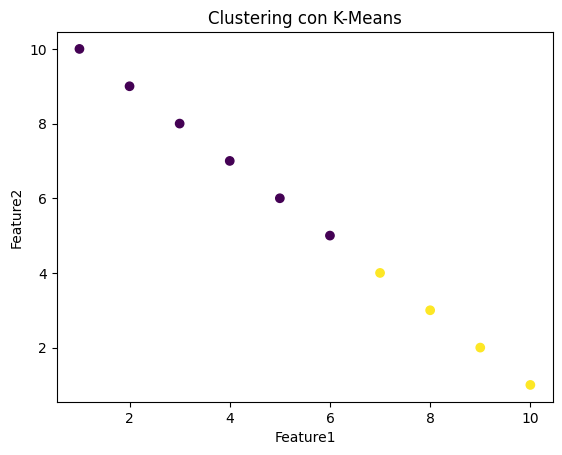

In [6]:

# Crear un dataset de ejemplo con 2 características
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
}

#Se estructura el dataset como un dataframe para poder manipularlo
df = pd.DataFrame(data)

# Mostrar los datos originales
print("Datos originales:")
print(df)

# Se estructura el KMeans para agrupar los datos en 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
# Se ejecuta el KMEANS para segmentar los datos en 2 grupos
# sobre el Dataframe original se almacena los resultados, agregando un nuevo atributo
# el cual es el grupo clasificado por instancia
df['Cluster'] = kmeans.fit_predict(df[['Feature1', 'Feature2']])

# Mostrar los resultados
print("\nDatos con Clusters:")
print(df)

# Visualizar los clusters: Genera un modelo que describe

#Se crea un grafico de dispersion, tomando como eje X y Y los atributos utilizados.
# El parametro C son los colores, que seran por cada grupo del atributo cluster
# CMAP: Plantilla de colores utilizados, pueden consultar mas en https://matplotlib.org/stable/users/explain/colors/colormaps.html
#
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering con K-Means')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


#DBSCAN (Density-Based Spatial Clustering of Applications with Noise)



Datos con Clusters asignados por DBSCAN:
    Feature1  Feature2  Cluster
0          1         1        0
1          2         2        0
2          3         3        0
3          8         8        0
4          9         9        0
5         10        10        0
6         25        25        0
7         26        26        0
8         27        27        0
9         50        50        1
10        55        55        1
11        60        60        1


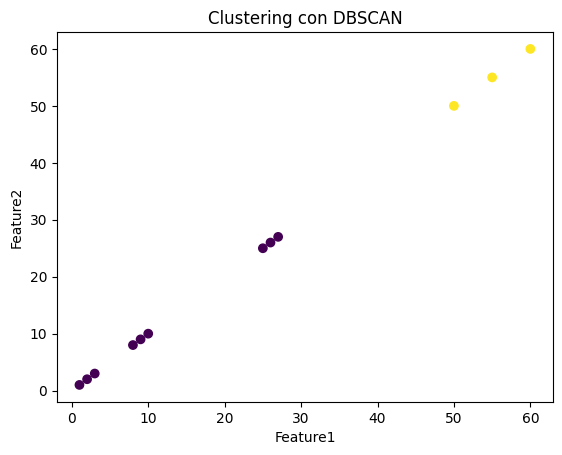

In [7]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Crear un dataset de ejemplo con 2 características
data = {
    'Feature1': [1, 2, 3, 8, 9, 10, 25, 26, 27, 50, 55, 60],
    'Feature2': [1, 2, 3, 8, 9, 10, 25, 26, 27, 50, 55, 60]
}

#Estructuramos el dataset como un dataframe
df = pd.DataFrame(data)

# Se estructuran los datos y se preparan para que sean analizados adecuadamente
#analizados por el algoritmo (numerizacion, normalizacion,etc.)

# Podemos aplicar una normalización (mirar categorías específicas que se ajusten más o menos a un rango), digamos  de un gurpo poblacional que se acomode a un rango, que se ajuste de numérico a categórico. Pero digamos tenemos textos que queremos volver numeritos, de forme que se pueden realizar interpretaciones, tener un valor numérico que está entre 0 y 1

# Para normalizar o estandarizar los datos depende del algoritmo, si son categoricos se pasan de numéricos a categóricos.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Feature1', 'Feature2']])


#Epsilon: La distancia máxima entre dos muestras para que una se considere vecina de la otra

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)  # eps (espsilon): tamaño del radio (por defecto es 0,5), min_samples: puntos mínimos para formar un cluster (si no es capaz de hacer la clusterización intenta hacer 2)
#Se ejecuta y los resultados se almacenan en el dataframe original en un nuevo atributo
df['Cluster'] = dbscan.fit_predict(scaled_features)

# Mostrar los resultados
print("Datos con Clusters asignados por DBSCAN:")
print(df)

# Visualizar los clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering con DBSCAN')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


In [8]:
%pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
#La librería mlxtend (extensiones de aprendizaje automático) es una biblioteca de Python que proporciona herramientas útiles para el analisis
from mlxtend.frequent_patterns import apriori, association_rules


# Crear un dataset con datos transaccionales (artículos comprados)
data = {
    'Leche':        [1, 0, 1, 1, 0],
    'Pan':          [1, 1, 0, 1, 1],
    'Mantequilla':  [0, 1, 1, 1, 0],
    'Café':         [1, 1, 0, 0, 1],
    'Cereal':       [0, 1, 1, 0, 1]
}

#Se estructura el dataframe
df = pd.DataFrame(data)

# Mostrar los datos originales
print("Transacciones:")
print(df)

#PRIMERO APLICAMOS EL APRIORI PARA ENCONTRAR FRECUENCIAS EN LOS DATOS

# Cuando el patrón se cumpla al menos un 60% de las veces, muéstrelo
# Aplicar el algoritmo Apriori para encontrar los itemsets frecuentes
# min_support=0.6 significa que buscamos ítems presentes en al menos el 60% de las transacciones
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Lo ideal es ir buscando un soporte de mínimo el 70%

# Mostrar los itemsets frecuentes
print("\nItemsets frecuentes encontrados:")
print(frequent_itemsets)

#CON LAS FRECUENCIAS IDENTIFICADAS, SE ESTRUCTURAN Y GENERAN LAS REGLAS DE ASOCIACION

# Generar reglas de asociación usando el parámetro 'confidence' (es decir el % de confianza), min_threshold (% minimo de aceptacion de confianza)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Mostrar las reglas de asociación generadas
print("\nReglas de Asociación:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

#'support': Proporción de transacciones que contienen el conjunto de ítems.(Si da 0.6, indica que los resultados son apoyados con el 60% de la muestra)
# El lift es una métrica utilizada en las reglas de asociación para medir la fuerza de una regla
"""Lift = 1: Los ítems X e Y son independientes.
Lift > 1: Los ítems X e Y tienden a ocurrir juntos más frecuentemente de lo esperado.
Lift < 1: Los ítems X e Y tienden a ocurrir juntos menos frecuentemente de lo esperado"""

# Lift es cuando es superior de uno dicta qué tan estructurado está el resultado


Transacciones:
   Leche  Pan  Mantequilla  Café  Cereal
0      1    1            0     1       0
1      0    1            1     1       1
2      1    0            1     0       1
3      1    1            1     0       0
4      0    1            0     1       1

Itemsets frecuentes encontrados:
   support       itemsets
0      0.6        (Leche)
1      0.8          (Pan)
2      0.6  (Mantequilla)
3      0.6         (Café)
4      0.6       (Cereal)
5      0.6    (Café, Pan)

Reglas de Asociación:
  antecedents consequents  support  confidence  lift
0      (Café)       (Pan)      0.6        1.00  1.25
1       (Pan)      (Café)      0.6        0.75  1.25


C:\Users\overd\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


'Lift = 1: Los ítems X e Y son independientes.\nLift > 1: Los ítems X e Y tienden a ocurrir juntos más frecuentemente de lo esperado.\nLift < 1: Los ítems X e Y tienden a ocurrir juntos menos frecuentemente de lo esperado'

Precisión del modelo: 100.00%

Matriz de Confusión:
[[1 0]
 [0 2]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



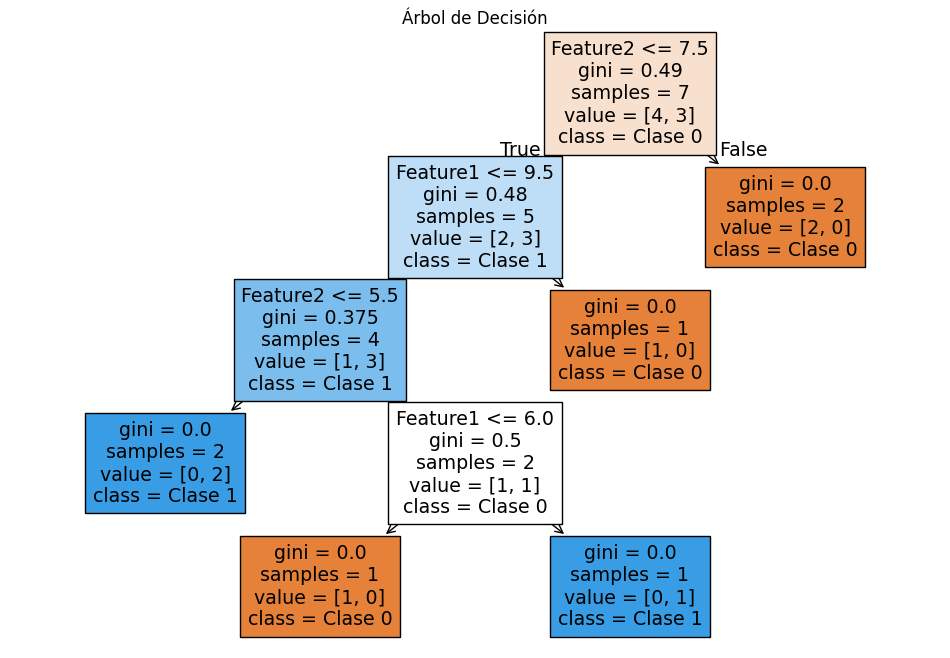

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [5, 7, 8, 3, 2, 1, 9, 10, 6, 4],
    'Feature2': [10, 9, 5, 6, 1, 2, 7, 3, 4, 8],
    'Target':   [0, 0, 1, 0, 1, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Separar características (X) y etiquetas (y)
X = df[['Feature1', 'Feature2']]  # Variables predictoras
y = df['Target']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización del Árbol de Decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['Feature1', 'Feature2'], class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title("Árbol de Decisión")
plt.show()
# descriptivo con barras o ploteo o cluster o asociación. hacer 05 tipos de análisis.
# Lo ideal es elegir o no aplicar una solución de donde uno escogió el sitio